<a href="https://colab.research.google.com/github/yardenzaki/yardenzaki-Keras-simple-CNN-classificatoin-color-plus-noise/blob/main/Test_Keras_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook i'll present some basic functionalities of Keras layers:


*   CenterCrop
*   Flatten

i'll demonstrate that "Model" doesn't have to include Dense layers and activation function. i'll present a model that does the following pipeline:
   64 images, random vals 10x10x3 -----center crop Layer---->

   64 images, random vals 5x5x3 -----Flatten Layer----> 

   random vals 64 x 75.


   Then, reshaping the model output (as nparray)  to the cropped image shape of:

```
# processed_data = processed_data.numpy().reshape(64,5,5,3)
```







In [1557]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Rescaling,CenterCrop,Flatten
from tensorflow.keras import layers
import keras

In [1558]:
data = np.random.randint(0, 256, size=(64, 10, 10, 3)).astype("int")

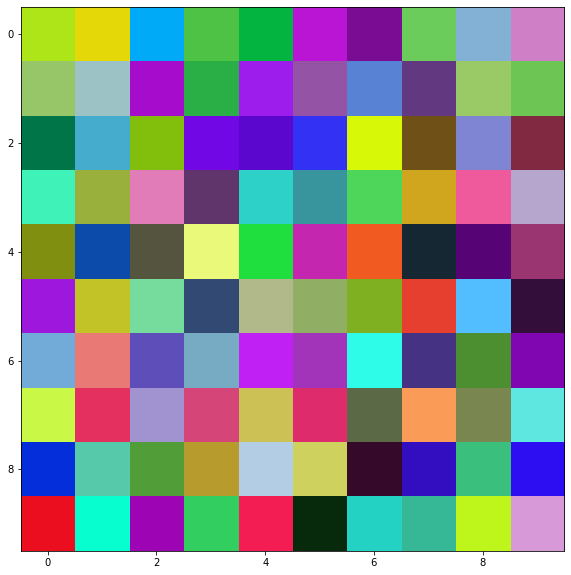

In [1559]:
plt.figure(figsize=(10,10))
plt.imshow(data[1])

# Building a model with Keras Functional API

In [1560]:

inputs = keras.Input(shape=(None, None, 3)) # Let's say we expect our inputs to be RGB images of arbitrary size
# Center-crop images to 5x5
x = CenterCrop(height=5, width=5)(inputs)
x = Flatten()(x)
len= x.shape
print(len)
outputs = layers.Dense(75)(x)


(None, 75)


In [1561]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [1562]:
processed_data = model(data)

In [1563]:
print(processed_data.shape)
processed_data = processed_data.numpy().reshape(64,5,5,3)

(64, 75)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


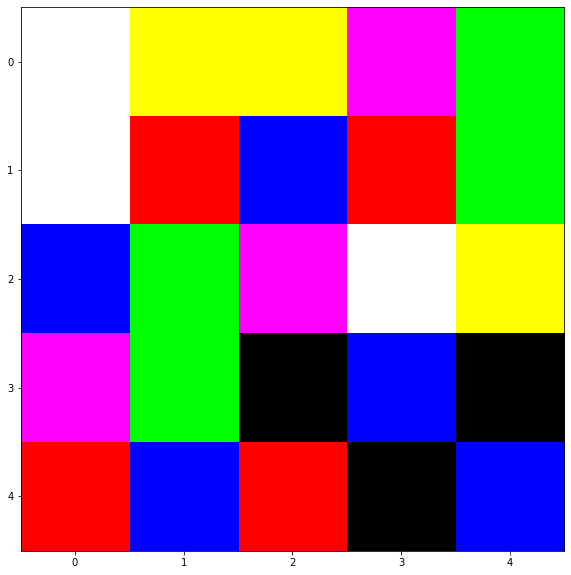

In [1564]:
plt.figure(figsize=(10,10))
plt.imshow(processed_data[1])

# Classification model

> make dummy data

> construct a classifier



In [1565]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.layers import Rescaling,Flatten 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [1566]:

red =  np.zeros([100, 10,10, 3], dtype=np.uint8)
red[:][:][:] = [255, 0, 0] 
red_noise = np.random.randint(0, 256, size=(100, 10, 10, 3)).astype("int")
red_noise[:][:][:][0] = 0
red = red + red_noise
red_lables = ["Red"]*100
red_lables=np.array(red_lables).reshape(100,1)

#print(red_lables)


green =  np.zeros([100, 10,10, 3], dtype=np.uint8)
green[:][:][:] = [0, 255, 0] 
green_noise = np.random.randint(0, 256, size=(100, 10, 10, 3)).astype("int")
green_noise[:][:][:][1] = 0
green = green + green_noise
green_lables =["Green"]*100
green_lables=np.array(green_lables).reshape(100,1)




blue =  np.zeros([100, 10,10, 3], dtype=np.uint8)
blue[:][:][:] = [0, 0, 255] 
blue_noise = np.random.randint(0, 256, size=(100, 10, 10, 3)).astype("int")
blue_noise[:][:][:][2] = 0
blue = blue + blue_noise
blue_lables = np.ones(100)
blue_lables = ["Blue"]*100
blue_lables=np.array(blue_lables).reshape(100,1)

Lables_data = np.vstack((red_lables,green_lables))
Lables_data = np.vstack((Lables_data,blue_lables))

# Lables_data_enc = pd.DataFrame(red_lables, columns = ['Red'])
# Lables_data_enc['Green'] = green_lables
# Lables_data_enc['Blue'] = blue_lables

def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot


Lables_data_encoded = one_hot(Lables_data)
print("Lables_data_encoded.shape",Lables_data_encoded.shape)
# encoder = LabelEncoder()
# encoder.fit(Y)

# print(enc.categories_)
# print(Lables_data_enc.head())




data = np.vstack((red,green))
data = np.vstack((data,blue))


data = Rescaling(scale=1.0 / data.max())(data).numpy()



print("Lables_data",Lables_data.shape)
print("data",data.shape)
print(data.max())


Lables_data_encoded.shape (300, 3)
Lables_data (300, 1)
data (300, 10, 10, 3)
1.0


In [1567]:
X_train, X_test, y_train, y_test = train_test_split(data, Lables_data_encoded, test_size=0.2,shuffle= True, random_state=42)

In [1568]:
print(X_train.shape)
print(y_test.shape)

(240, 10, 10, 3)
(60, 3)


In [1569]:

train_data = np.random.randint(0, 256, size=(64, 10, 10, 3)).astype("int")
test_data = np.random.randint(0, 256, size=(64, 10, 10, 3)).astype("int")

Image: [0. 0. 1.]


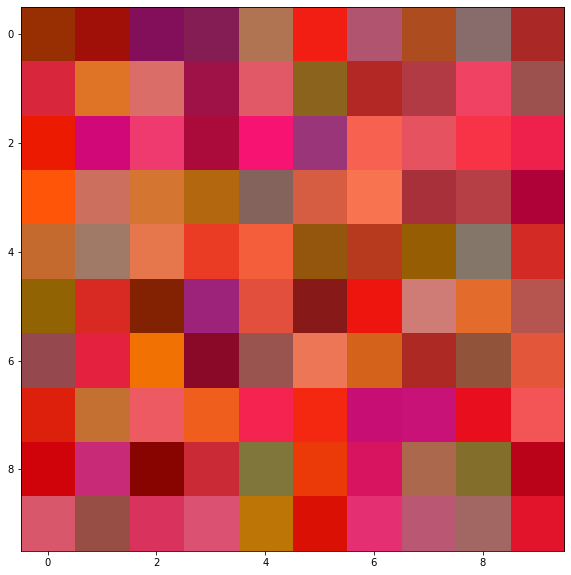

In [1570]:
image_idx = 6
plt.figure(figsize=(10,10))
print("Image:", y_train[image_idx])
plt.imshow(X_train[image_idx])

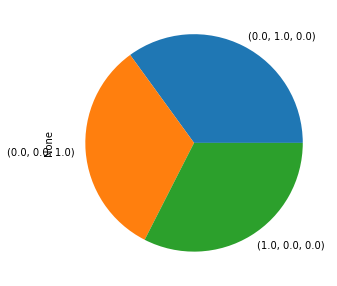

In [1571]:
import pandas as pd
c = pd.DataFrame(y_train)
c.value_counts().plot(kind='pie', figsize=(10,5))

## Preprocessing 
Rescaling and flattening



In [1572]:
from tensorflow.keras.layers import Rescaling,Flatten 
print(X_train.max())
print(X_train.min())
X_train_preproc=X_train.copy()
X_test_preproc=X_test.copy()
y_train_preproc=y_train.copy()
y_test_preproc=y_test.copy()

print(X_train_preproc.shape)
print(y_train_preproc.shape)

1.0
0.0
(240, 10, 10, 3)
(240, 3)


## Constructing Classifier inc. pre-proc. layers 



Conv + max pooling layers



In [1573]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(10,10,3))
print(inputs.shape)
#x = layers.Flatten()(inputs)
# Apply some convolution and pooling layers
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(3, 3))(x)

# Apply global average pooling to get flat feature vectors
x = layers.GlobalAveragePooling2D()(x)

# Add a dense classifier on top
num_classes = 3
outputs = layers.Dense(num_classes, activation="softmax")(x)


(None, 10, 10, 3)


In [1574]:
model = keras.Model(inputs=inputs, outputs=outputs)

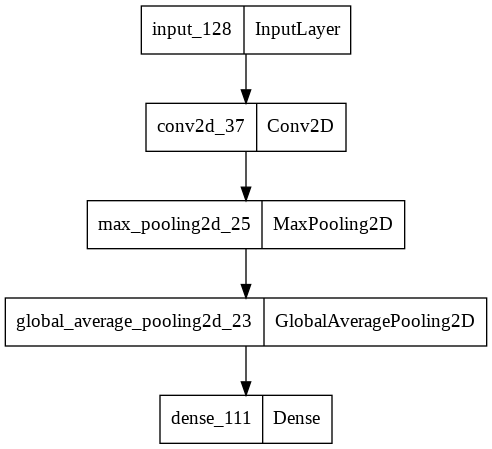

In [1575]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')

In [1576]:
model.summary()

Model: "model_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_128 (InputLayer)      [(None, 10, 10, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 32)          896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_23  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_111 (Dense)           (None, 3)                 99        
                                                                 
Total params: 995
Trainable params: 995
Non-trainable par

## model fit

In [1577]:
# Load the Tensorboard notebook extension
# And import datetime

%load_ext tensorboard
!rm -rf ./logs/
# Create a callback

tfboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [1578]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_preproc, y_train_preproc,batch_size=10, epochs=30,validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 1s 12ms/step - loss: 0.9182 - accuracy: 0.8073 - val_loss: 0.8118 - val_accuracy: 1.0000
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 0.7047 - accuracy: 1.0000 - val_loss: 0.6104 - val_accuracy: 1.0000
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.5189 - accuracy: 1.0000 - val_loss: 0.4379 - val_accuracy: 1.0000
Epoch 4/30
20/20 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 1.0000 - val_loss: 0.3061 - val_accuracy: 1.0000
Epoch 5/30
20/20 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 1.0000 - val_loss: 0.2111 - val_accuracy: 1.0000
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 1.0000 - val_loss: 0.1454 - val_accuracy: 1.0000
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 0.1275 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 1.0000
Epoch 8/30
20/20 [=

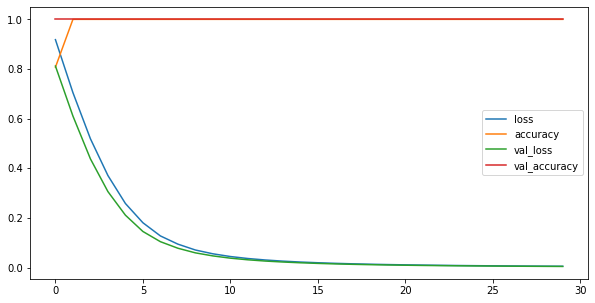

In [1579]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(model.history.history)

# Plotting the loss and accuracy

loss_acc_metrics_df.plot(figsize=(10,5))

In [1580]:
eval = model.evaluate(X_test_preproc, y_test_preproc)
print(eval)
#print('Test loss: {}\nTest accuracy:{}'.format(eval[0],eval[1]))

2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 1.0000
[0.004912033677101135, 1.0]


## Check accuracy

Color:
Red


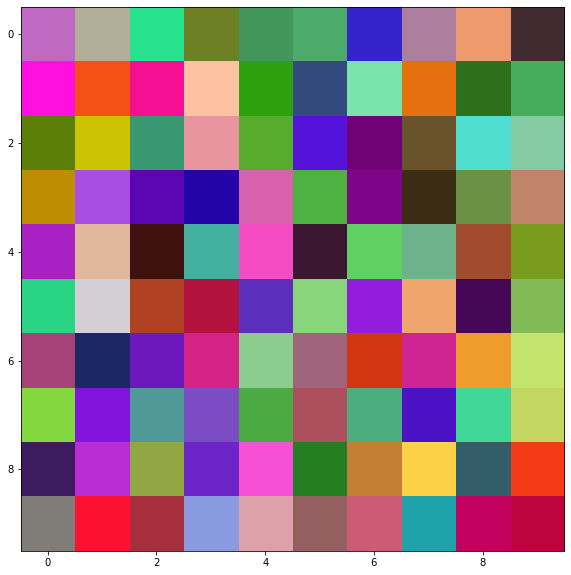

In [1593]:
import tensorflow as tf
# new instances where we do not know the answer
color =  np.zeros([100, 10,10, 3], dtype=np.uint8)
color[:][:][:] = [30, 0, 0] # Red
color_noise = np.random.randint(0, 256, size=(100, 10, 10, 3)).astype("int")
color_noise[:][:][:][1] = 0
color = color + color_noise
# Same pre-proc.
color = Rescaling(scale=1.0 / color.max())(color).numpy()

# make a prediction
predictions = model.predict(color)
predictions = tf.round(predictions)
color_dict = {2:"Red",1:"Green",0:"Blue"}


plt.figure(figsize=(10,10))
plt.imshow(color[0])

print("Color:")
print(color_dict[predictions[0].numpy().argmax()])

In [1582]:
#%tensorboard --logdir logs